In [1]:
import warnings
import sys
sys.path.append('../')
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate
from texttable import Texttable

import latextable
from PrepareData import read_json, make_folder

In [3]:
sample_df = pd.read_csv('sample_motivation.csv')
sample_df.head()

,A,X1,X2,Y_prob,Y,ID,fill,color
0,1.0,1.362435,1.058662,-1.029193,0.0,0.0,blue,blue
1,1.0,1.138824,1.083898,-0.900074,1.0,1.0,blue,blue
2,1.0,1.147183,1.093110,-0.906932,1.0,2.0,blue,blue
3,1.0,1.092703,1.028559,-0.861334,1.0,3.0,blue,blue
4,1.0,1.286541,1.088514,-0.989627,1.0,4.0,blue,blue


In [4]:
sample_df['color'].unique()

array(['blue', 'orange', 'white'], dtype=object)

In [5]:
sample_df['fill'].unique()

array(['blue', 'orange', 'red'], dtype=object)

In [6]:
# generate samples
# x1_centers = [1.2, 1.5, 1.3, 1.6]
# x1_std = [0.1, 0.1, 0.1, 0.1]

# x2_centers = [1, 1.2, 0.8, 0.8]
# x2_std = [0.1, 0.1, 0.1, 0.1]

# weights_x1 = [-0.6, -0.6, 0.6, 0.6]
# weights_x2 = [-0.2, -0.2, -0.4, -0.4]

# conds = [-1, -1, 0.6, 0.6]
# sizes = [55, 25, 5, 15]
# np.random.seed(1)

# sample_df = pd.DataFrame(columns=['A', 'X1', 'X2', 'Y_prob', 'Y'])
# groups = [1, 1, 0, 0]
# labels = [0, 1, 0, 1]
# for mu_x1, sigma_x1, mu_x2, sigma_x2, weight_x1, weight_x2, cond_i, group_i, size_i in zip(x1_centers, x1_std, x2_centers, x2_std, weights_x1, weights_x2, conds, groups, sizes):
#     cur_x1_values = np.random.normal(mu_x1, sigma_x1, size_i)
#     cur_x2_values = np.random.normal(mu_x2, sigma_x2, size_i)
#     for x1_i, x2_i in zip(cur_x1_values, cur_x2_values):
#         y_i = weight_x1*x1_i + weight_x2* x2_i
        
#         if cond_i > 0:
#             y_int_i = int(y_i < cond_i)
#         else:
#             y_int_i = int(y_i > cond_i)
#         sample_df.loc[sample_df.shape[0]] = [group_i, x1_i, x2_i, y_i, y_int_i]


In [6]:
# remove the white filling points
# sample_df = sample_df[sample_df['color']!='white']

In [7]:
repo_dir = sys.path[0].replace('notebooks', '')
plot_path = repo_dir + 'intermediate/plots/example/'
make_folder(plot_path)
plot_path

'/Users/keyang/Projects/PubRepo/NonInvasiveTool4FairML/intermediate/plots/example/'

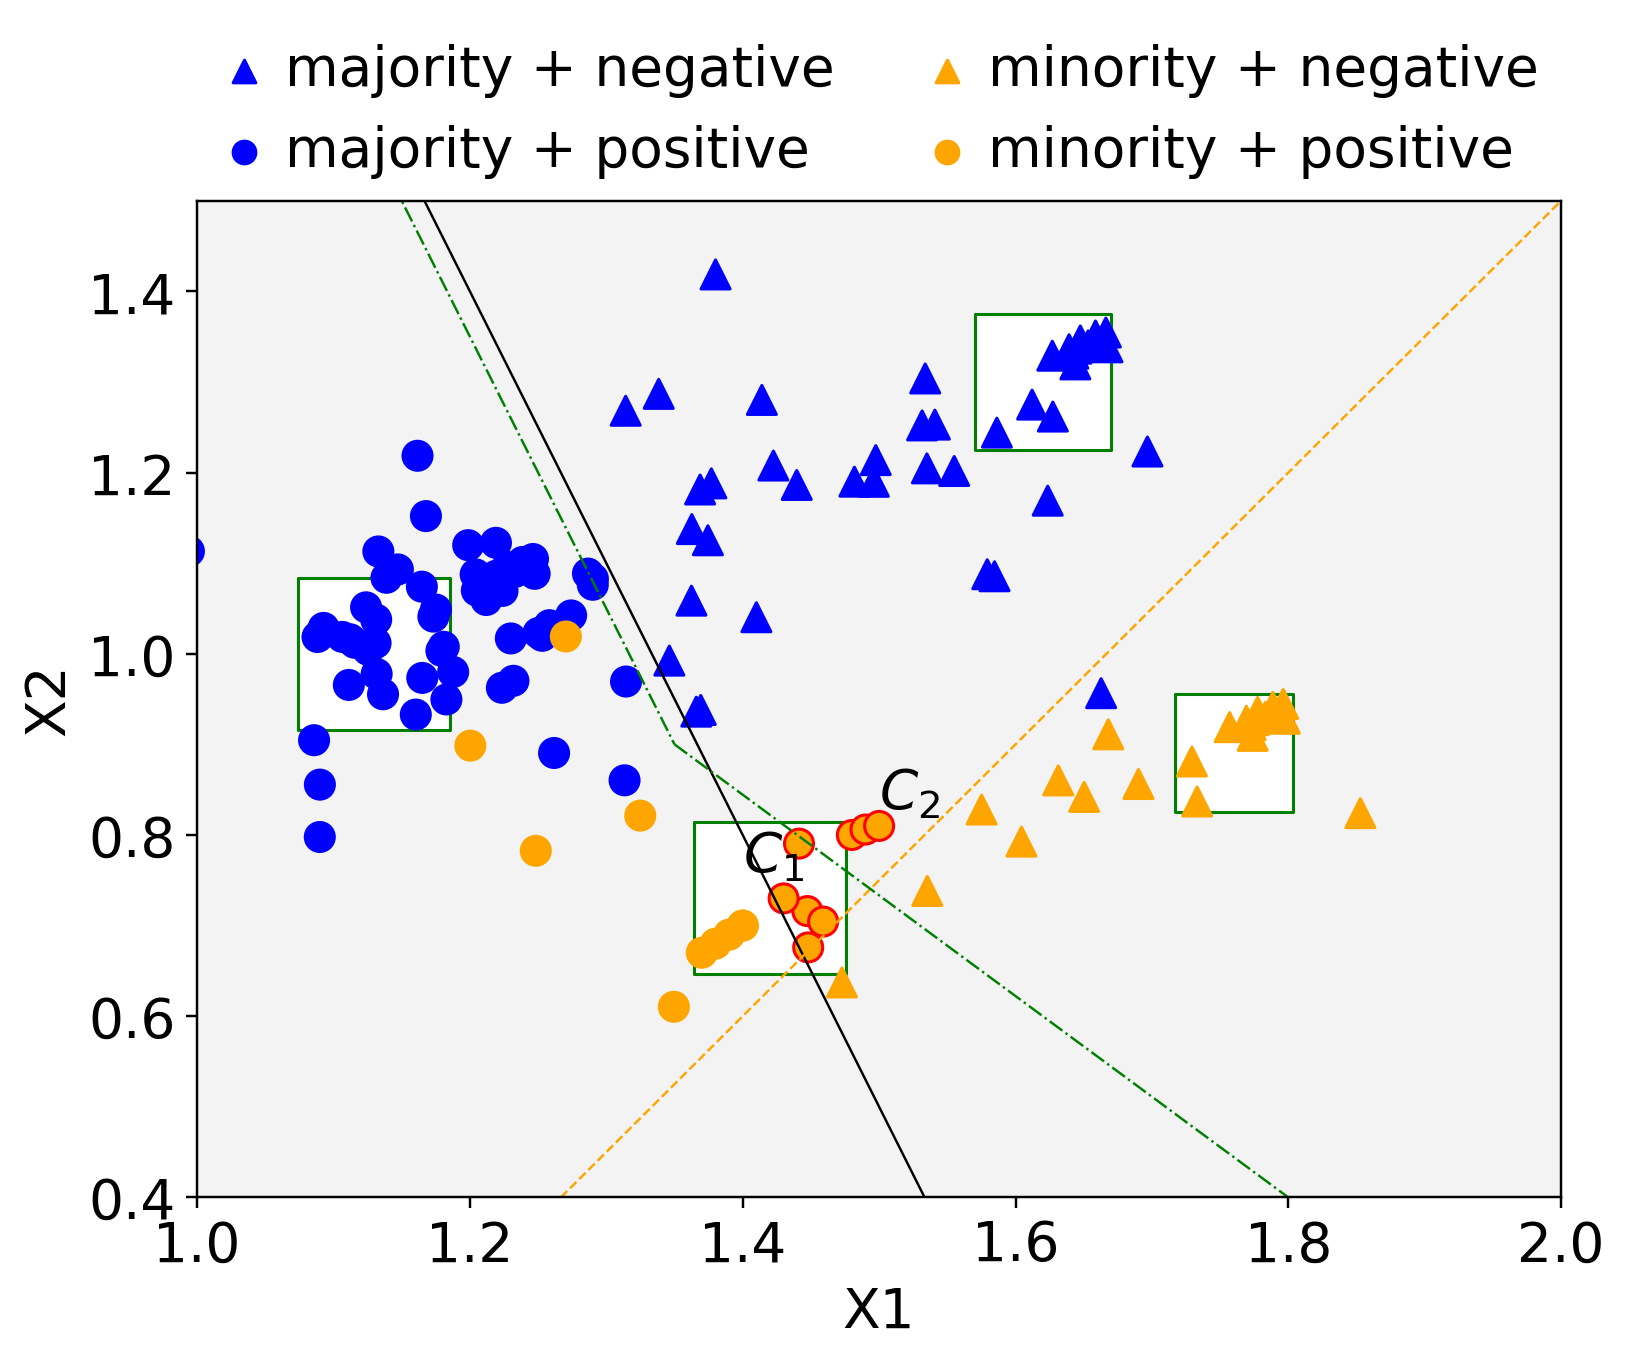

In [11]:

fig, ax = plt.subplots(1, figsize=(8, 6), dpi=220)
groups = [1, 1, 0, 0]
labels = [0, 1, 0, 1]
markers = ['^', 'o', '^', 'o']
colors = ['blue', 'blue', 'orange', 'orange']
legends = ['majority + negative', 'majority + positive', 'minority + negative', 'minority + positive']
plt.scatter(1.42, 0.73, s=2500, color='white', edgecolor='green', marker='s')
plt.scatter(1.13, 1, s=2500, color='white', edgecolor='green', marker='s')
plt.scatter(1.62, 1.3, s=2000, color='white', edgecolor='green', marker='s')
plt.scatter(1.76, 0.89, s=1500, color='white', edgecolor='green', marker='s')

for group_i, label_i, marker_i, color_i in zip(groups, labels, markers, colors):
    cur_df = sample_df.query('A=={} and Y=={}'.format(group_i, label_i))
    
    plt.scatter(cur_df['X1'], cur_df['X2'], c=cur_df['color'], marker=marker_i, edgecolors=cur_df['fill'], s=90, label='')

    
for group_i, label_i, marker_i, color_i, legend_i in zip(groups, labels, markers, colors, legends):
    plt.scatter(-1, -1, c=color_i, marker=marker_i, edgecolors=color_i, s=55, label=legend_i)
    
line_x1 = [1, 1.2, 1.4, 1.6, 2.0]

g1_x2 = [-3*x+5 for x in line_x1]
g0_x2 = [1.5*x-1.5 for x in line_x1]

plt.plot(line_x1, g1_x2, linestyle='solid', color='black', linewidth=0.8)
plt.plot(line_x1, g0_x2, linestyle='dashed', color='orange', linewidth=0.8)
cc_g1_x1 = [1, 1.2, 1.35]
cc_g1_x2 = [-3*x+4.95 for x in cc_g1_x1]
cc_g0_x1 = [1.35, 1.8]
cc_g0_x2 = [0.9, 0.4]

plt.plot(cc_g1_x1, cc_g1_x2, linestyle='dashdot', color='green', linewidth=0.8)
plt.plot(cc_g0_x1, cc_g0_x2, linestyle='dashdot', color='green', linewidth=0.8)

ax.set_facecolor('#f3f3f3')
plt.ylim(0.4, 1.5)
plt.xlim(1.0, 2.0)
font_s = 18
plt.xlabel('X1', fontsize=font_s)
plt.ylabel('X2', fontsize=font_s)
plt.xticks(fontsize=font_s)
plt.yticks(fontsize=font_s)
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower center", mode="expand", ncol=2, frameon=False, borderaxespad=0, handlelength=0.9, handletextpad=0.3, fontsize=font_s)
plt.text(1.4, 0.76, '$C_1$', fontsize=font_s)
plt.text(1.5, 0.83, '$C_2$', fontsize=font_s)
plt.savefig(plot_path+'motivation.png', bbox_inches="tight")

In [14]:
# # adding error cases where SCC mispredicts but MCC predicts correctly. 
# sample_df.loc[139] = [0, 1.48, 0.80, 0.6*1.48 + (-0.4*0.80), 1, 139, 'red', 'orange']
# sample_df.loc[140] = [0, 1.49, 0.806, 0.6*1.49 + (-0.4*0.806), 1, 140, 'red', 'orange']
# sample_df.loc[141] = [0, 1.5, 0.81, 0.6*1.5 + (-0.4*0.81), 1, 141, 'red', 'orange']

In [25]:
# sample_df.to_csv('sample_motivation.csv', index=False)

In [ ]:
# # adding color and filling column
# def get_filling_color(x):
#     if x.iloc[0] == 0 and 1.4<x.iloc[1]<1.6 and x.iloc[2] >0.83:
#         return 'red'
#     else:
#         if x.iloc[0] == 0:
#             return 'orange'
#         else:
#             return 'blue'
# color_map = {0: 'orange', 1: 'blue'}
# sample_df['fill'] = sample_df[['A', 'X1', 'X2']].apply(lambda x: get_filling_color(x), axis=1)
# sample_df['color'] = sample_df['A'].apply(lambda x: color_map(x), axis=1)

In [270]:
# # adding clusters for SCC squres
# np.random.seed(1)
# cur_shift_x1 = np.random.normal(1, 0.1, size=10)/10
# cur_shift_x2 = np.random.normal(0.9, 0.1, size=10)/10
# color_map = {0: 'orange', 1: 'blue'}
# cluster_x1 = [1.13, 1.55, 1.68]
# cluster_x2 = [1, 1.25, 0.84]
# groups = [1, 1, 0]
# labels = [1, 0, 0]
# weights_x1 = [-0.6, -0.6, 0.6]
# weights_x2 = [-0.2, -0.2, -0.4]
# for c_1, c_2, g_i, l_i, w_1, w_2 in zip(cluster_x1, cluster_x2, groups, labels, weights_x1, weights_x2):
#     for s_1, s_2 in zip(cur_shift_x1, cur_shift_x2):
#         y_i = w_1 * (c_1+s_1) + w_2 * (c_2+s_2)
#         sample_df.loc[sample_df.shape[0]] = [g_i, c_1+s_1, c_2+s_2, y_i, l_i, sample_df.shape[0], color_map[g_i], color_map[g_i]]

In [218]:
# # adding g0 POS cluster
# np.random.seed(12)
# cur_shift = [x/100 for x in np.random.randint(1, 10, 6)]
# for shift_i in cur_shift:
#     x_1_center = 1.36
#     x_2_center = 0.66
#     cur_x1 = x_1_center + shift_i
#     cur_x2 =  x_2_center + shift_i
#     sample_df.loc[sample_df.shape[0]] = [0, cur_x1, cur_x2, 0.6*cur_x1 + (-0.4*cur_x2), 1, sample_df.shape[0], 'orange', 'orange']

In [114]:
# # adding error cases for G0 POS #TODO add the ID 
# sample_df.loc[sample_df.shape[0]] = [0, 1.4, 0.42, 0.6*1.4 + (-0.4*0.42), 1, sample_df.shape[0], 'red', 'orange']
# sample_df.loc[sample_df.shape[0]] = [0, 1.45, 0.5, 0.6*1.45 + (-0.4*0.5), 1, sample_df.shape[0]+1, 'red', 'orange']
# sample_df.loc[sample_df.shape[0]] = [0, 1.39, 0.48, 0.6*1.39 + (-0.4*0.48), 1, sample_df.shape[0]+1, 'red', 'orange']

In [181]:
# def move_down_x1(x, error_list):
#     if x.iloc[1] in error_list:
#         return x.iloc[0]+0.01
#     else:
#         return x
# def move_down_x2(x, error_list):
#     if x.iloc[1] in error_list:
#         return x.iloc[0]+0.01
#     else:
#         return x

In [182]:
# # minor adjustment for G0 POS error cases
# g0_error = [94]
# sample_df['X1'] = sample_df[['X1', 'ID']].apply(lambda x: move_down_x1(x, g0_error), axis=1)
# sample_df['X2'] = sample_df[['X2', 'ID']].apply(lambda x: move_down_x2(x, g0_error), axis=1)